<a href="https://colab.research.google.com/github/adolfoguimaraes/teoriadosgrafos/blob/main/03_Caminhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caminhos

Nesse laboratório vamos abordar alguns conceitos sobre caminhos vistos em sala de aula. Preparados? 

![](https://media.giphy.com/media/4QFcVnf41d2Lb5I0MK/giphy.gif?cid=ecf05e4785rre5sbp5y94a1vkybn7fy3h8kho3pf00242nmp&rid=giphy.gif&ct=g)

## Importação e métodos de apoio

In [ ]:
# importando a biblioteca 

import networkx as nx

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt

In [ ]:
# Função em Python para facilitar a impressão do Grafo. 

def exibir_grafo(grafo):
  options = {
      'node_color': '#0080FF',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )
  plt.show()

# Construindo o grafo

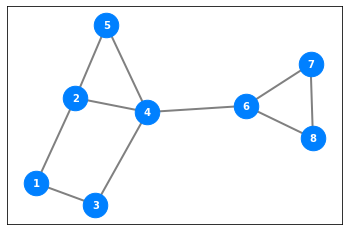

In [ ]:
# Instanciando o objeto Grafo
G = nx.Graph()

# Adicionando os Vértices
G.add_nodes_from([1,2,3,4,5,6,7,8])

# Adicionando as Arestas
G.add_edges_from([
                  (1,2),(1,3),(2,4),(2,5),
                  (3,4),(4,5),(4,6),(6,7),(6,8),(7,8)
                  ])
                 

exibir_grafo(G)

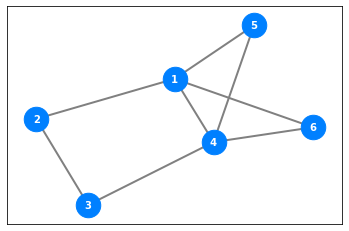

In [ ]:
# Construindo um segundo grafo

G1 = nx.Graph()

G1.add_nodes_from([1,2,3,4,5,6])

G1.add_edges_from([
                  (1,2),(1,4),(1,5),(1,6),
                  (2,3),
                  (3,4),
                  (4,5),(4,6)
                  ])

exibir_grafo(G1)

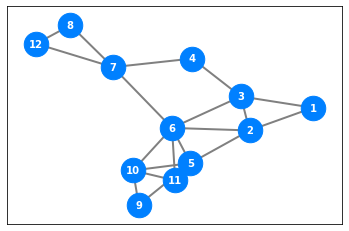

In [ ]:
G2 = nx.Graph()

G2.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])
G2.add_edges_from([
                   (1,2),(1,3),
                   (2,3),(2,5),(2,6),
                   (3,4),(3,6),
                   (4,7),
                   (5,6),(5,9),(5,10),
                   (6,7),(6,10),(6,11),
                   (7,8),(7,12),
                   (8,12),
                   (9,10),
                   (10,11),
])

exibir_grafo(G2)

## Grafo Euleriano

![](https://media.giphy.com/media/8qUjDf9PZlHZ6/giphy.gif?cid=ecf05e47tmvttgnx8d534qywcz38epe6d11ujhbh3xsmiiu3&rid=giphy.gif&ct=g)

Nossa primeira implementação vai ser a criação de um método que dado um grafo, verifica se ele é Euleriano. A gente viu em sala de aula que para um grafo ser Eureliano, ele deve possui um circuito euleriano. 

Uma forma simples de fazer isso é verificar se todos os vértices do grafo possuem grau par. Vale lembrar, que o grau de um vértice é a quantidade de arestas conectadas a ele, no caso de um grafo não-direcionado.

Vamos lá?



In [ ]:
# retorna o grau de um vértice
def degree_(graph_, node):
  return len(list(nx.neighbors(graph_, node)))

In [ ]:
# retorna True se o grafo é euleriano e False, caso contrário
def is_eulerian(graph_):

  for node in list(graph_.nodes):
    if degree_(graph_, node) % 2 != 0:
      return False
    
  return True



In [ ]:
is_eulerian(G1)

True

In [ ]:
is_eulerian(G)

False

Agora que a gente já sabe identificar se o Grafo é Euleriano ou não podemos implementar um método que retorna esse caminho.

### E aí? Aceitam esse desafio? 

![](https://media.giphy.com/media/Su5akvPQ4p3GpP3YHK/giphy.gif?cid=ecf05e47zcxvg2xeshgz2lj3z2ygraxk7v80cwcayoqorkxv&rid=giphy.gif&ct=g)

### Vamos pensar um pouquinho na técnica estudada. 

![](https://media.giphy.com/media/3o7btPCcdNniyf0ArS/giphy-downsized.gif?cid=ecf05e47jufc8js9cb1k8w85n4d5tppw6l04x4uwlnmnfrif&rid=giphy-downsized.gif)

O algoritmo estudado foi o Algoritmo de Hierholzer que consiste em encontrar vários ciclos de depois combina-los em um caminho que seria o caminho Euleriano. Lembrando que isso só é possível se o grafo for Euleriano. Vamos organizar a nossa implementação da seguinte forma: 

* Primeiro vamos testar se o grafo é euleriano ou não. Caso não seja, retornamos a mensagem informando que não é possível encontrar o circuito. Caso seja, retornamos o caminho. 
* Em seguida, vamos implementar um método que faz uma busca no grafo até formar um ciclo. Lembrando que esse ciclo deve ser formado sempre passando por arestas que ainda não foram visitadas. Esse método deve ser utilizado para encontrar todos os ciclos possíveis de ser formado. 
* Após essa etapa, vamos criar o método que combina esses ciclos de forma a gerar o caminho euleriano. 



In [ ]:
def eulerian_path(graph_):

  if not is_eulerian(graph_):
    raise Exception("The graph has vertices with odd degree.")
  else:

    all_circles = graph_circles(graph_)
    path_ = combine_circles(all_circles)    

    return path_


def get_circle(graph_, start):

  
  actual_node = start;
  list_ = [actual_node]
  zero_list = []

  while(True):
    node_temp = list(nx.neighbors(graph_, actual_node))[0]
    list_.append(node_temp)
    graph_.remove_edge(actual_node, node_temp)
    actual_node = node_temp
    
    if (actual_node == start):
      break

  graph_.remove_nodes_from(list(nx.isolates(graph_)))
  
  return list_

def graph_circles(graph_):
  
  modify_graph = graph_.copy()

  lists_ = []

  while modify_graph.size() != 0:

    start_node = list(modify_graph.nodes)[0]
    circle_ = get_circle(modify_graph, start_node)
    lists_.append(circle_)

  return lists_


def combine_two_lists(l1, l2):
  if not l2:
    return l1
  else:
    result_ = [l1[0]]
    first = True
    for value in l1[1:]:
      if value == l2[0] and first:
        first = False
        for value2 in l2:
          result_.append(value2)
      else:
        result_.append(value)
    
    return result_  

def combine_circles(list_):
  if len(list_) == 2:
    
    return combine_two_lists(list_[0], list_[1])
  else:
    combine_ = combine_two_lists(list_[0], list_[1])
    tail_ = list_[2:]
    
    return combine_circles([combine_] + tail_)



In [ ]:
def imprimir_caminho_euleriano(graph_):
  exibir_grafo(graph_)
  try:
    path_ = eulerian_path(graph_)
    print("Caminho euleriano: %s" % path_)
  except Exception as e:
    print("Não é possível gerar o caminho euleriano para o grafo passado.")


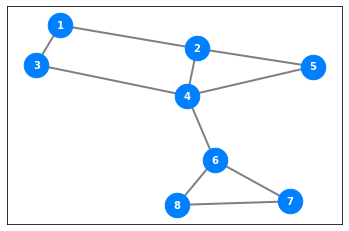

Não é possível gerar o caminho euleriano para o grafo passado.


In [ ]:
imprimir_caminho_euleriano(G)

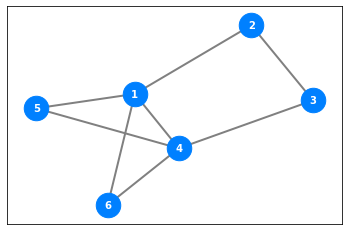

Caminho euleriano: [1, 2, 3, 4, 1, 5, 4, 6, 1]


In [ ]:
imprimir_caminho_euleriano(G1)

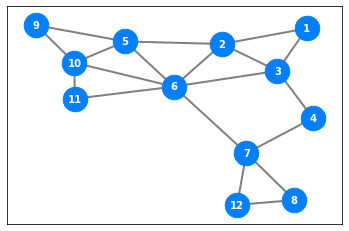

Caminho euleriano: [1, 2, 5, 9, 10, 5, 6, 10, 11, 6, 2, 3, 4, 7, 8, 12, 7, 6, 3, 1]


In [ ]:
imprimir_caminho_euleriano(G2)

# Vamos implementar

Agora é sua vez!!!

![](https://media.giphy.com/media/cXblnKXr2BQOaYnTni/giphy.gif?cid=ecf05e47tlmhz9i8c593eu0i1jpibaq9mkgtw5tl9vgu9ynu&rid=giphy.gif&ct=g)

## 1. Implemente o algoritmo de menor caminho que recebe como parâmetro um vértice e imprime a tabela de menor caminho vista em sala de aula. 


🤖 Vamos tentar? Tente implementar sem olhar a resposta disponível. Agora é sua hora de treinar os algoritmos vistos. 

In [ ]:
#Coloque sua implementação a partir deste espaço

### Implementação do Professor

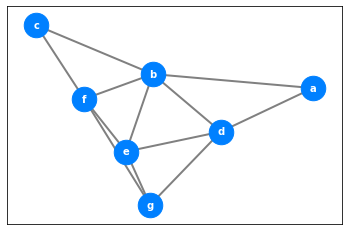

In [ ]:
# Instanciando o objeto Grafo com pesos utilizar no algoritmo de menor caminho
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from(["a","b","c","d","e","f","g"])

# Adicionando as Arestas
G1.add_edge("a", "b", weight=1)
G1.add_edge("a", "d", weight=4)
G1.add_edge("b", "c", weight=2)
G1.add_edge("b", "d", weight=6)
G1.add_edge("b", "e", weight=4)
G1.add_edge("b", "f", weight=8)
G1.add_edge("c", "f", weight=6)
G1.add_edge("d", "e", weight=3)
G1.add_edge("d", "g", weight=4)
G1.add_edge("e", "g", weight=9)
G1.add_edge("e", "f", weight=8)
G1.add_edge("f", "g", weight=3)


exibir_grafo(G1)

In [ ]:
# retorna o vértice com o menor valor da distância na tabela
# dentre os vértices que ainda não se conhece a menor distância
def get_less_table(table):
  
  selected = {k: v for k, v in table.items() if v['is_less'] == False}
  sorted_ = sorted(selected.items(), key=lambda kv: kv[1]['distance'])
  
  return sorted_[0][0]

In [ ]:
# Algoritmo de Dijikstra
def less_path(graph, v):

  table_ = {v: {'is_less': True, 'distance': 0, 'path': ''}}
  found_ = [v]
  actual_node = v

  
  while set(found_) != set(list(graph.nodes())):

    all_neighbors = [x for x in list(nx.neighbors(graph, actual_node)) if x not in found_]
    for neigh in all_neighbors:
      new_distance = table_[actual_node]['distance'] + graph.get_edge_data(actual_node, neigh, 'weight')['weight']
      if neigh in table_.keys():
        if new_distance < table_[neigh]['distance']:
          table_[neigh]['distance'] = new_distance
          table_[neigh]['path'] = actual_node
      else:
        table_[neigh] = {'is_less': False, 'distance': new_distance, 'path': actual_node}
        
      
    actual_node = get_less_table(table_)
    table_[actual_node]['is_less'] = True
    found_.append(actual_node)


  return table_

  


In [ ]:
table_result = less_path(G1, 'a')
table_result

{'a': {'distance': 0, 'is_less': True, 'path': ''},
 'b': {'distance': 1, 'is_less': True, 'path': 'a'},
 'c': {'distance': 3, 'is_less': True, 'path': 'b'},
 'd': {'distance': 4, 'is_less': True, 'path': 'a'},
 'e': {'distance': 5, 'is_less': True, 'path': 'b'},
 'f': {'distance': 9, 'is_less': True, 'path': 'b'},
 'g': {'distance': 8, 'is_less': True, 'path': 'd'}}

## 2. Implemente uma nova versão do algoritmo de menor caminho que recebe dois vértices como entrada: um vértice de origem e um de destino. O algoritmo deve retornar o menor caminho (os vértices que compõem o caminho e o custo) do vértice dde origem para o de destino. 

🤖 Vamos tentar? Tente implementar sem olhar a resposta disponível. Agora é sua hora de treinar os algoritmos vistos. 

In [ ]:
#Coloque sua implementação a partir deste espaço

### Implementação do Professor

In [ ]:
# Algoritmo de Dijikstra
def less_path_startend(graph, start, end):

  table_ = {start: {'is_less': True, 'distance': 0, 'path': ''}}
  found_ = [start]
  actual_node = start

  
  while set(found_) != set(list(graph.nodes())):

    all_neighbors = [x for x in list(nx.neighbors(graph, actual_node)) if x not in found_]
    for neigh in all_neighbors:
      new_distance = table_[actual_node]['distance'] + graph.get_edge_data(actual_node, neigh, 'weight')['weight']
      if neigh in table_.keys():
        if new_distance < table_[neigh]['distance']:
          table_[neigh]['distance'] = new_distance
          table_[neigh]['path'] = actual_node
      else:
        table_[neigh] = {'is_less': False, 'distance': new_distance, 'path': actual_node}
        
      
    actual_node = get_less_table(table_)
    table_[actual_node]['is_less'] = True
    found_.append(actual_node)

    if actual_node == end:
      break


  return get_path(end, table_), table_[end]['distance']

  


In [ ]:
def get_path(end, table):
  return_path = [end]
  path_ = table_result[end]['path']
  while path_ != '':
    return_path.insert(0, path_)
    path_ = table_result[path_]['path']

  return return_path

In [ ]:
less_path_startend(G1, 'a', 'f')

(['a', 'b', 'f'], 9)

### Por hoje é só 🤖 

![](https://media.giphy.com/media/3o85xAojNshmzlySyc/giphy.gif?cid=ecf05e47rw9bmsnbhmee4nr59vlxjyleffqr9s1dgu9r8bo7&rid=giphy.gif&ct=g)

É isso pessoal. Até a próxima aula 😊